<a href="https://colab.research.google.com/github/SapphireAG/GDSC-task/blob/main/GDSC_Recruitment_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D,Flatten,Activation,BatchNormalization
from keras.layers import MaxPooling2D
import pandas as pd
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [10]:
batch_size=32
num_classes=10
epochs=20
data_augmentation=False

In [5]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print("x_train shape ",x_train.shape)
print("y_train shape ",y_train.shape)
print("train samples ",x_train.shape[0])
print("test samples ",x_test.shape[0])

x_train shape  (50000, 32, 32, 3)
y_train shape  (50000, 1)
train samples  50000
test samples  10000


In [6]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
x_train/=255
x_test/=255
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)


In [7]:
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 512)                 │              

 Total params: 1,253,674 (4.78 MB)

 Trainable params: 1,252,266 (4.78 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [12]:
opt=keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

early_stopping=EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

red_lr=ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    min_lr=1e-6
)

In [13]:
history = None  # For recording the history of trainning process.
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              callbacks=[red_lr,early_stopping],
              shuffle=True)

Not using data augmentation.
Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 321s 198ms/step - accuracy: 0.6959 - loss: 0.8671 - val_accuracy: 0.6903 - val_loss: 0.8627 - learning_rate: 0.0010
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 313s 192ms/step - accuracy: 0.7307 - loss: 0.7709 - val_accuracy: 0.6438 - val_loss: 1.0841 - learning_rate: 0.0010
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 323s 193ms/step - accuracy: 0.7578 - loss: 0.6999 - val_accuracy: 0.7596 - val_loss: 0.7059 - learning_rate: 0.0010
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 301s 193ms/step - accuracy: 0.7698 - loss: 0.6668 - val_accuracy: 0.7322 - val_loss: 0.7642 - learning_rate: 0.0010
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 311s 186ms/step - accuracy: 0.7828 - loss: 0.6257 - val_accuracy: 0.7700 - val_loss: 0.6593 - learning_rate: 0.0010
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 330s 191ms/step - accuracy: 0.7990 - loss: 0.5834 - val_accuracy: 0.7912 - val_loss: 0.5936 - learning_rate: 0.0010
Epoch 7/20
1563/1563 ━━

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


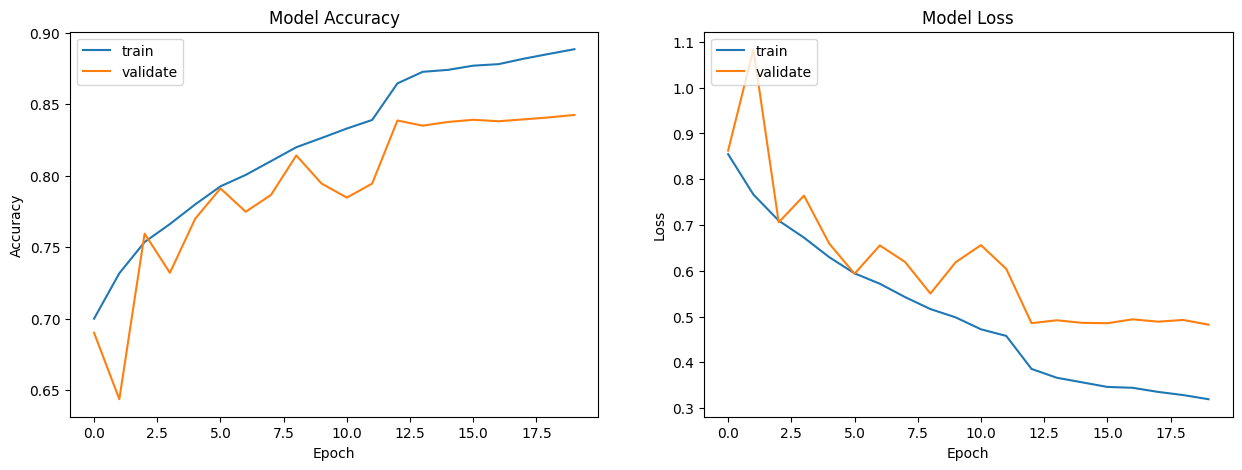

In [14]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))

    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')

    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

print(history.history.keys())

plotmodelhistory(history)

In [15]:
scores=model.evaluate(x_test,y_test,verbose=1)
print("Test Loss: ",scores[0])
print("Test Accuracy ",scores[1])
pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.8461 - loss: 0.4773
Test Loss:  0.48229339718818665
Test Accuracy  0.8425999879837036
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step


In [16]:
Y_pred_classes=np.argmax(pred,axis=1)
Y_true=np.argmax(y_test,axis=1)
errors=(Y_pred_classes -Y_true!=0)


In [17]:
print(classification_report(Y_true,Y_pred_classes))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.93      0.91      0.92      1000
           2       0.81      0.74      0.77      1000
           3       0.74      0.69      0.71      1000
           4       0.79      0.84      0.82      1000
           5       0.79      0.78      0.78      1000
           6       0.82      0.92      0.87      1000
           7       0.89      0.87      0.88      1000
           8       0.89      0.92      0.90      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



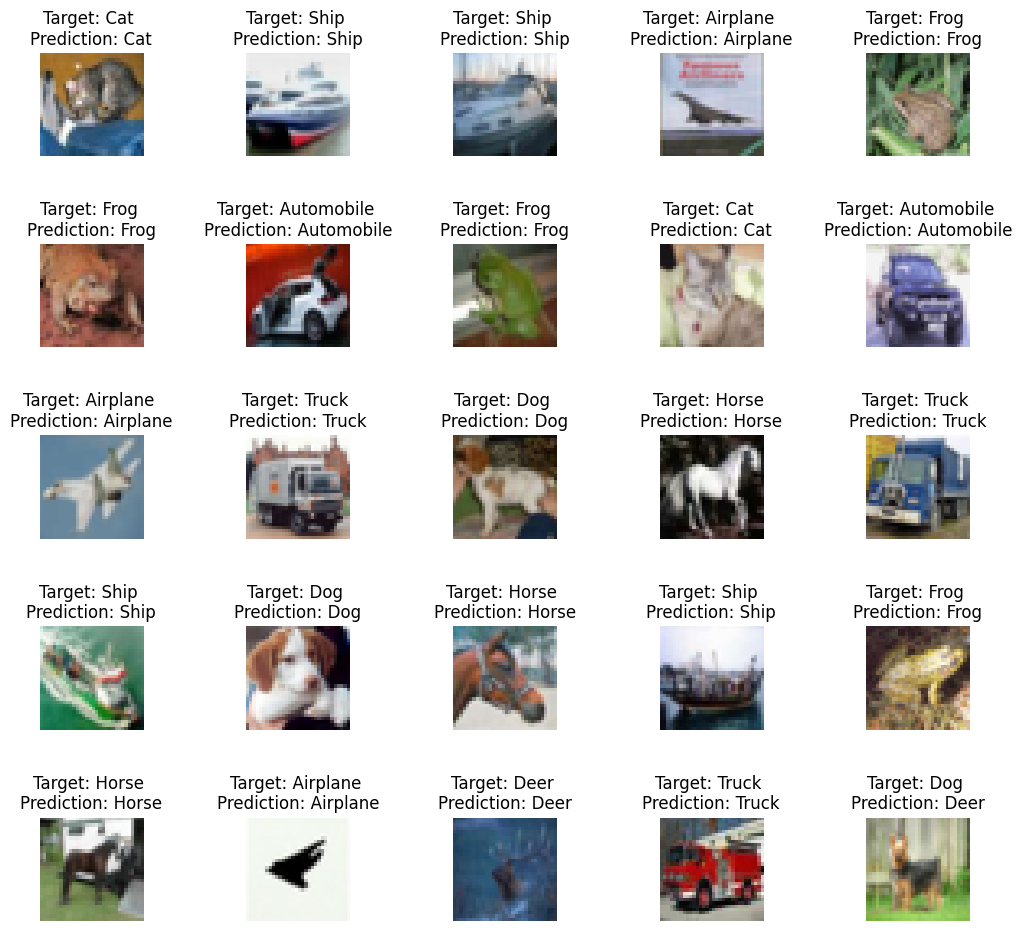

In [18]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
fig,axes=plt.subplots(5,5,figsize=(12,12))
axes=axes.ravel()
for i in np.arange(0,25):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Target: %s \nPrediction: %s"%(labels[Y_true[i]],labels[Y_pred_classes[i]]))
    axes[i].axis("off")
    plt.subplots_adjust(wspace=1)

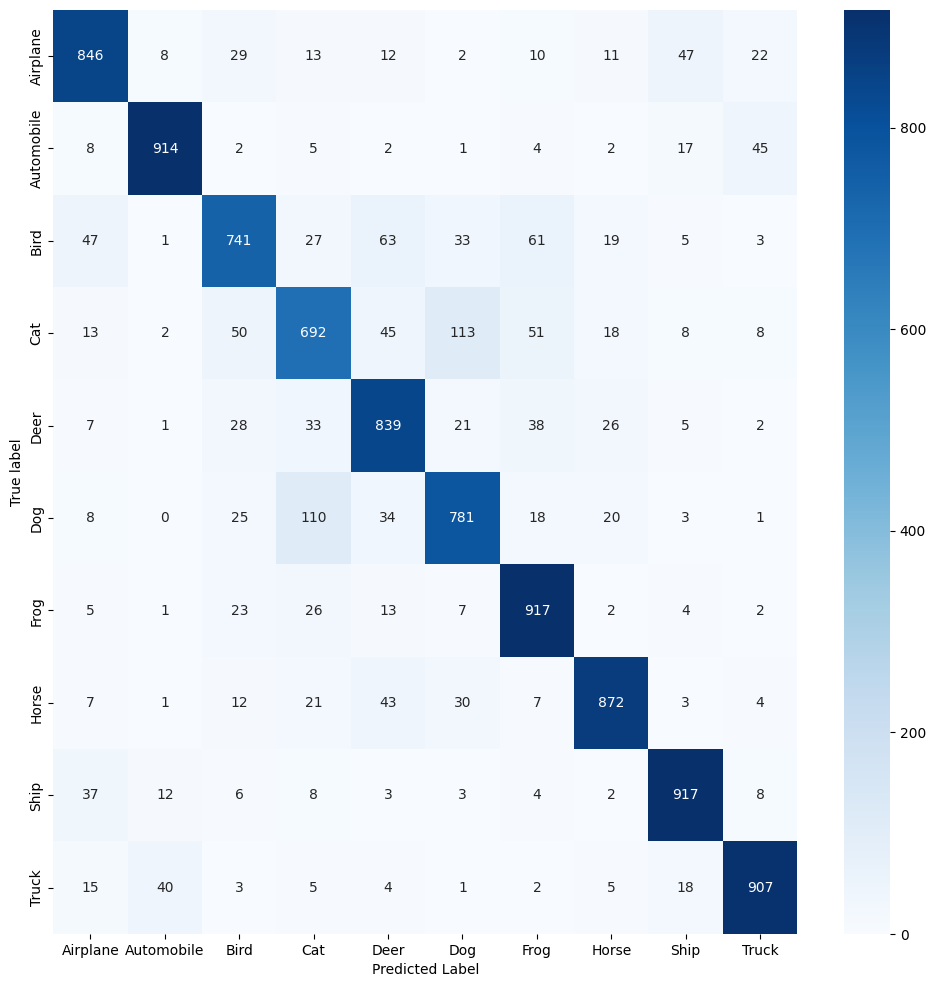

In [19]:
Y_pred_classes_errors=Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors=x_test[errors]
cm=confusion_matrix(Y_true,Y_pred_classes)
thresh=cm.max()/2
plt.figure(figsize=(12,12))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=labels,yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True label")
plt.show()

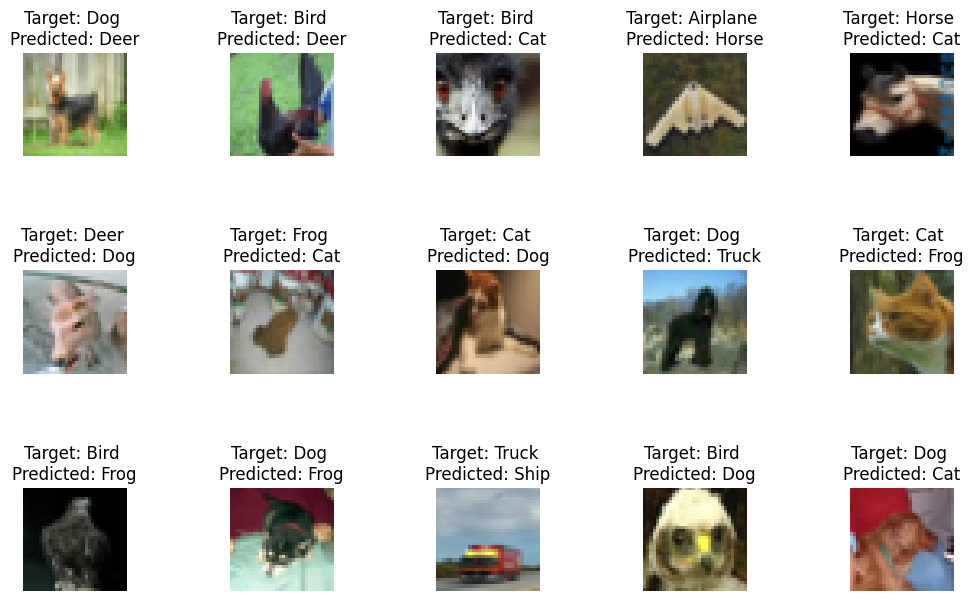

In [20]:
R=3
C=5
fig,axs=plt.subplots(3,5,figsize=(12,8))
axs=axs.ravel()
misclassified_idx=np.where(Y_pred_classes!=Y_true)[0]
for i in np.arange(0,R*C):
    axs[i].imshow(x_test[misclassified_idx[i]])
    axs[i].set_title("Target: %s \nPredicted: %s"%(labels[Y_true[misclassified_idx[i]]],labels[Y_pred_classes[misclassified_idx[i]]]))
    axs[i].axis('off')
    plt.subplots_adjust(wspace=1)


In [22]:

def preprocess_dataset(x, y, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((x, y))

    dataset = dataset.map(lambda img, label: (
        preprocess_input(tf.image.resize(img, (224, 224))),
        label
    ), num_parallel_calls=tf.data.AUTOTUNE)

    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

train_dataset = preprocess_dataset(x_train, y_train, batch_size=32)
test_dataset = preprocess_dataset(x_test, y_test, batch_size=32)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

base_model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [25]:
model2=Sequential([
    base_model,
    Flatten(),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])

In [12]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model2.fit(train_dataset,epochs=10,validation_data=test_dataset,batch_size=8)

Epoch 1/10
  33/1563 ━━━━━━━━━━━━━━━━━━━━ 8:35:58 20s/step - accuracy: 0.1821 - loss: 2.1683

KeyboardInterrupt: 

In [10]:
import psutil
ram = psutil.virtual_memory()
print(f"Total RAM: {ram.total / 1e9:.2f} GB")


Total RAM: 13.61 GB
